     Model Name  Training Error  Test Error  Training Time (s)
0   SVM (C=0.1)        0.151522      0.1740           1.449909
1   SVM (C=0.1)        0.117249      0.1435           0.962595
2   SVM (C=0.1)        0.088613      0.1195           1.146971
3   SVM (C=0.1)        0.057497      0.1175           4.317558
4   SVM (C=0.1)        0.021421      0.1235          86.727324
5   SVM (C=0.1)        0.000000      0.1475         393.170898
6   SVM (C=0.1)        0.000000      0.1485         337.696698
7   SVM (C=0.1)        0.000000      0.1455         373.135601
8   SVM (C=0.1)        0.000000      0.1425         373.343968
9   SVM (C=0.1)        0.000000      0.1435         322.254139
10  SVM (C=0.1)        0.000000      0.1440         273.870847
11  SVM (C=0.1)        0.000000      0.1445         251.007510
12  SVM (C=0.1)        0.000000      0.1435         243.334745
13  SVM (C=0.1)        0.000000      0.1425         221.451959
14  SVM (C=0.1)        0.000000      0.1395         205

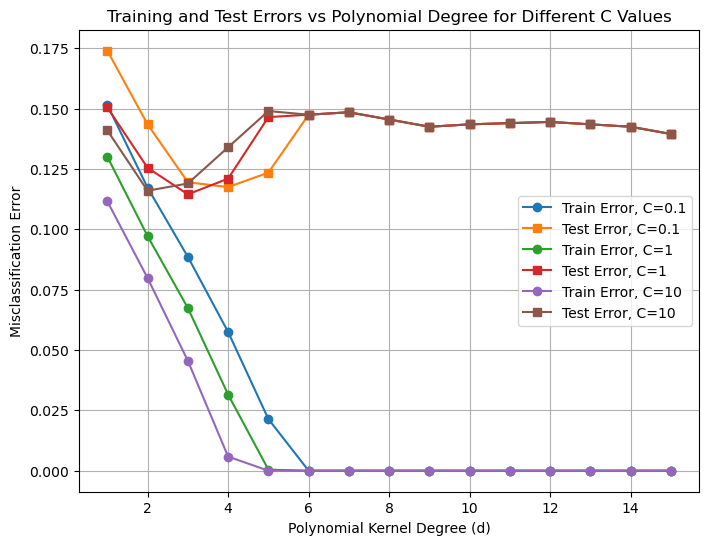

In [28]:
import warnings
warnings.filterwarnings('ignore')

import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

Y = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Y.dat")
X = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\X.dat")
Y_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Ytest.dat")
X_test = np.loadtxt(r"C:\Users\basak\Documents\MS-Data Science\Spring-2025\Python\ML HW\dataset\satimage\Xtest.dat")

C_values = [0.1, 1, 10]
d_values = list(range(1, 16))

train_error = {C: [] for C in C_values}
test_error = {C: [] for C in C_values}
model_names = {C: [] for C in C_values}
times = {C: [] for C in C_values}

for C in C_values:
    for d in d_values:
        start_time = time.time()
        model = SVC(C=C, kernel='poly', degree=d, random_state=42, cache_size=500)
        model.fit(X, Y)

        train_err = 1 - model.score(X,Y)
        test_err = 1 - model.score(X_test, Y_test)
    
        total_t = time.time() - start_time
       
        model_names[C].append(f"SVM (C={C})")
        train_error[C].append(train_err)
        test_error[C].append(test_err)
        times[C].append(total_t)

        results_df = pd.DataFrame({
        "Model Name": model_names[C],
        "Training Error": train_error[C],
        "Test Error": test_error[C],
        "Training Time (s)": times[C],
    })

    print(results_df)

best_results = []
for C in C_values:
    for d in d_values:
        min_test_error_idx = np.argmin(test_error[C])
        best_combination = {
            "Model Name": f"SVM (C={C})",
            "Training Error": train_error[C][min_test_error_idx],
            "Test Error": test_error[C][min_test_error_idx],
            "Total Training Time (s)": times[C][min_test_error_idx],
        }

    best_results_df = pd.DataFrame([best_combination])
    print(best_results_df)

plt.figure(figsize=(8, 6))
for C in C_values:
    plt.plot(d_values, train_error[C], label=f'Train Error, C={C}', marker='o')
    plt.plot(d_values, test_error[C], label=f'Test Error, C={C}', marker='s')

plt.xlabel('Polynomial Kernel Degree (d)')
plt.ylabel('Misclassification Error')
plt.title('Training and Test Errors vs Polynomial Degree for Different C Values')
plt.legend()
plt.grid()
plt.show()
